###   Loading the  Dataset 

In [24]:
import pandas as pd
import matplotlib.pyplot as plt 

In [25]:
data_fa = pd.read_excel("sdsu_dti.xlsx", sheet_name="FA")
data_ad= pd.read_excel("sdsu_dti.xlsx", sheet_name="AD")
data_md = pd.read_excel("sdsu_dti.xlsx", sheet_name="MD")
data_rd = pd.read_excel("sdsu_dti.xlsx", sheet_name="RD")



In [26]:
print(data_fa.shape, data_ad.shape, data_md.shape, data_rd.shape , sep = "\n")

# Conclusion - 33 patients with 50 levels of concentraion of each horomone (features) 

(33, 51)
(33, 51)
(33, 51)
(33, 51)


In [27]:

'''  
 What does this  data represent ?? 

 for 1 patient (1 row ) => 50 cols (1st col =id )
 each col show fa content , ad conrent , md , red content types of diffusivity of brain cells water . 

 e.g.  - in fa dataset 
  Patient 1 -  FA1  , FA2 , FA3 , .......  , FA50

 same Patient1 - AD1 , AD2 , AD3 , .......  , AD50
'''

'  \n What does this  data represent ?? \n\n for 1 patient (1 row ) => 50 cols (1st col =id )\n each col show fa content , ad conrent , md , red content types of diffusivity of brain cells water . \n\n e.g.  - in fa dataset \n  Patient 1 -  FA1  , FA2 , FA3 , .......  , FA50\n\n same Patient1 - AD1 , AD2 , AD3 , .......  , AD50\n'

In [28]:
data_fa.head()

,subid,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,28853,0.451130,0.001380,0.000996,0.359556,0.000804,0.452963,0.001080,0.000706,0.364961,...,0.539403,0.001518,0.001041,0.641271,0.000802,0.508916,0.001391,0.000958,0.616360,0.000741
1,28855,0.467566,0.001595,0.001284,0.272231,0.001129,0.425564,0.001514,0.001110,0.382879,...,0.510736,0.001107,0.000782,0.475895,0.000620,0.485475,0.001240,0.000903,0.405867,0.000734
2,28856,0.435630,0.001339,0.000938,0.387526,0.000737,0.432600,0.001199,0.000739,0.441476,...,0.514267,0.002041,0.001556,0.442456,0.001314,0.504539,0.001945,0.001478,0.520390,0.001245
3,28857,0.476368,0.001328,0.000893,0.408251,0.000675,0.460020,0.001102,0.000753,0.288921,...,0.474131,0.001266,0.000922,0.420720,0.000750,0.447187,0.001221,0.000921,0.313831,0.000771
4,28859,0.424540,0.001318,0.000951,0.317832,0.000768,0.380490,0.001077,0.000781,0.045132,...,0.488586,0.001511,0.001036,0.575356,0.000799,0.447191,0.001712,0.001224,0.555148,0.000980


In [29]:
data_ad.head()

,subid,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,28853,0.464791,0.001233,0.000859,0.480706,0.000672,0.415518,0.001441,0.001032,0.549669,...,0.616551,0.001168,0.000712,0.538396,0.000484,0.620440,0.001233,0.000711,0.576015,0.000451
1,28855,0.442318,0.001871,0.001400,0.491962,0.001165,0.424534,0.001772,0.001395,0.302843,...,0.637175,0.001149,0.000762,0.339945,0.000569,0.639842,0.001206,0.000738,0.444814,0.000504
2,28856,0.405412,0.001371,0.000994,0.323157,0.000805,0.406109,0.001426,0.001033,0.514428,...,0.622554,0.001278,0.000737,0.556224,0.000466,0.605800,0.001335,0.000753,0.653998,0.000462
3,28857,0.428357,0.001382,0.000983,0.534818,0.000783,0.394907,0.001512,0.001100,0.485541,...,0.579026,0.001234,0.000767,0.515767,0.000533,0.591634,0.001398,0.000830,0.521665,0.000546
4,28859,0.428598,0.001342,0.000940,0.462547,0.000739,0.395397,0.001354,0.000957,0.621327,...,0.658902,0.001340,0.000735,0.614459,0.000432,0.629272,0.001317,0.000753,0.568053,0.000472


In [30]:
data_fa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   subid   33 non-null     int64  
 1   1       33 non-null     float64
 2   2       33 non-null     float64
 3   3       33 non-null     float64
 4   4       33 non-null     float64
 5   5       33 non-null     float64
 6   6       33 non-null     float64
 7   7       33 non-null     float64
 8   8       33 non-null     float64
 9   9       33 non-null     float64
 10  10      33 non-null     float64
 11  11      33 non-null     float64
 12  12      33 non-null     float64
 13  13      33 non-null     float64
 14  14      33 non-null     float64
 15  15      33 non-null     float64
 16  16      33 non-null     float64
 17  17      33 non-null     float64
 18  18      33 non-null     float64
 19  19      33 non-null     float64
 20  20      33 non-null     float64
 21  21      33 non-null     float64
 22  22  

In [31]:
X1= data_fa.iloc[: , 1:]
X1

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.451130,0.001380,0.000996,0.359556,0.000804,0.452963,0.001080,0.000706,0.364961,0.000519,...,0.539403,0.001518,0.001041,0.641271,0.000802,0.508916,0.001391,0.000958,0.616360,0.000741
1,0.467566,0.001595,0.001284,0.272231,0.001129,0.425564,0.001514,0.001110,0.382879,0.000909,...,0.510736,0.001107,0.000782,0.475895,0.000620,0.485475,0.001240,0.000903,0.405867,0.000734
2,0.435630,0.001339,0.000938,0.387526,0.000737,0.432600,0.001199,0.000739,0.441476,0.000510,...,0.514267,0.002041,0.001556,0.442456,0.001314,0.504539,0.001945,0.001478,0.520390,0.001245
3,0.476368,0.001328,0.000893,0.408251,0.000675,0.460020,0.001102,0.000753,0.288921,0.000579,...,0.474131,0.001266,0.000922,0.420720,0.000750,0.447187,0.001221,0.000921,0.313831,0.000771
4,0.424540,0.001318,0.000951,0.317832,0.000768,0.380490,0.001077,0.000781,0.045132,0.000633,...,0.488586,0.001511,0.001036,0.575356,0.000799,0.447191,0.001712,0.001224,0.555148,0.000980
5,0.423584,0.001781,0.001440,0.276306,0.001270,0.397785,0.001351,0.001015,0.269882,0.000847,...,0.487408,0.001309,0.000882,0.441360,0.000668,0.492272,0.001479,0.001041,0.412211,0.000822
6,0.457982,0.001453,0.001035,0.391008,0.000826,0.419372,0.001068,0.000749,0.259666,0.000590,...,0.533724,0.001172,0.000795,0.387240,0.000607,0.508635,0.001155,0.000804,0.370883,0.000629
7,0.446063,0.001705,0.001308,0.365091,0.001109,0.471909,0.001030,0.000708,0.417721,0.000547,...,0.538089,0.001114,0.000745,0.361561,0.000561,0.539401,0.001180,0.000811,0.311115,0.000627
8,0.434152,0.001500,0.001031,0.390126,0.000796,0.430111,0.001110,0.000717,0.505828,0.000520,...,0.488247,0.001316,0.000838,0.553509,0.000599,0.502900,0.001312,0.000832,0.602075,0.000592
9,0.438326,0.000906,0.000906,0.449650,0.000674,0.420066,0.000744,0.000744,0.439452,0.000544,...,0.509068,0.000809,0.000809,0.660641,0.000554,0.503040,0.000821,0.000821,0.652600,0.000573


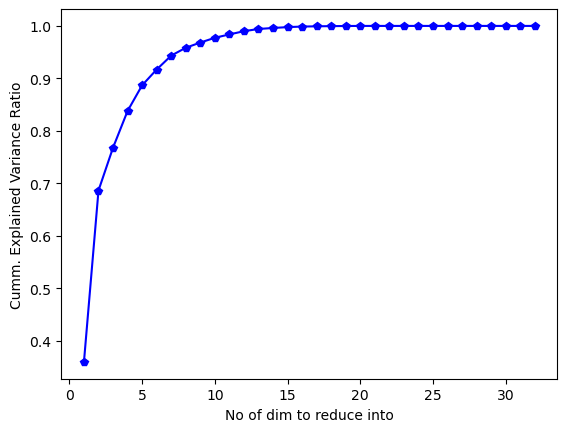

In [32]:
from sklearn.decomposition import PCA

# proper no. of dimensions 
dim = []
sum= 0
for n in range(1,33) :
    pca = PCA(n_components = n)
    pca.fit(X1)
    
    t = list(pca.explained_variance_ratio_)
    sum+=t[-1]
    dim.append(sum)

plt.plot(range(1,33) , dim , marker='p', linestyle='-', color='b')
plt.xlabel("No of dim to reduce into")
plt.ylabel("Cumm. Explained Variance Ratio")
plt.show()

# almpost reduce into 10 dimensions .

In [33]:
X2 =X1
X3 =X1

In [34]:
pca1 = PCA(n_components =10)
X = pca1.fit_transform(X1)
# new feature dataset = X
X.shape

(33, 10)

In [35]:
pca2 = PCA(n_components =2)
x2 = pca2.fit_transform(X2)
# new feature dataset = X
x2.shape

(33, 2)

### Data Visualization

### K-Means clustering


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

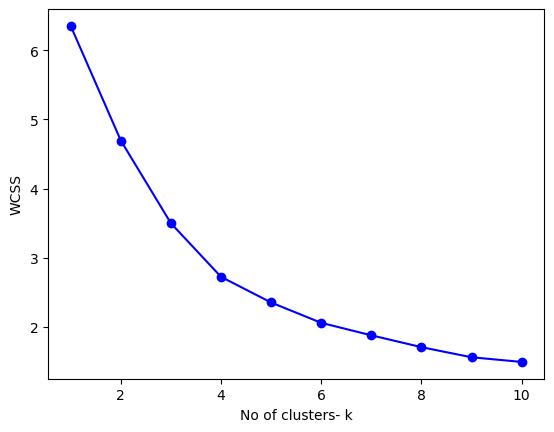

In [36]:
# to find appropriate no of clusters in the dataset X 

# use model's WCSS .

from sklearn.cluster import KMeans
wcss =[]

for k in range(1 ,11) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plot the wcss v/s no of clusters graph 
plt.plot(range(1 , 11) , wcss , marker='o' , linestyle ='-' , color ='b')
plt.xlabel("No of clusters- k")
plt.ylabel("WCSS")
plt.show()
# wcss =sum of squared distance of daat ponts from its clustr's mean , and sum this over all clusters. 
# lesser the wcss , bettter the cluster 
# elbow joint shows where model inertia / wcss start to decrement at slower rate

# so 6 cluster in maximum .

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

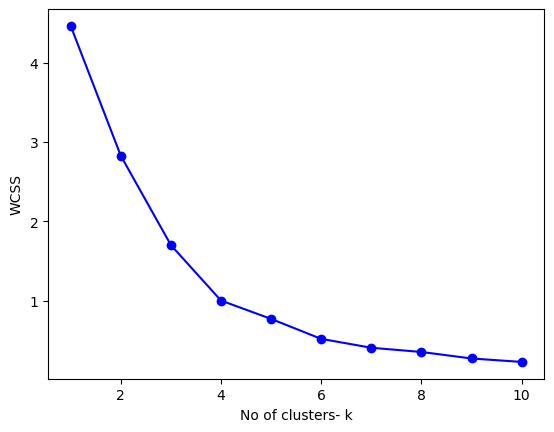

In [37]:
# for 2 features ONLY - for data visualization
from sklearn.cluster import KMeans
wcss1 =[]

for k in range(1 ,11) :
    kmeans3 = KMeans(n_clusters = k)
    kmeans3.fit(x2)
    wcss1.append(kmeans3.inertia_)

#plot the wcss v/s no of clusters graph 
plt.plot(range(1 , 11) , wcss1, marker='o' , linestyle ='-' , color ='b')
plt.xlabel("No of clusters- k")
plt.ylabel("WCSS")
plt.show()

In [38]:
# K - Means Clusatering 

from sklearn.cluster import KMeans 

kmeans = KMeans (n_clusters = 6 )
predict = kmeans.fit_predict(X)


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
kmeans.predict(X[1: 2, :]) # so patientrs'2 FA predicts that it lies in  third cluster .

array([0])

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


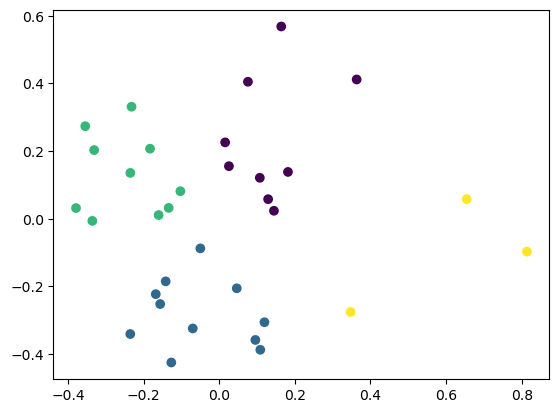

In [40]:


'''for 2 featuees'''

kmeans2 = KMeans(n_clusters =4)
kmeans2.fit(x2)
pred = kmeans2.predict(x2)
'''  

Data visulaization for n-cluster = 2'''

plt.scatter(x2[: , :1]  , x2[: , 1:] ,c = pred , cmap='viridis')
plt.show()

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

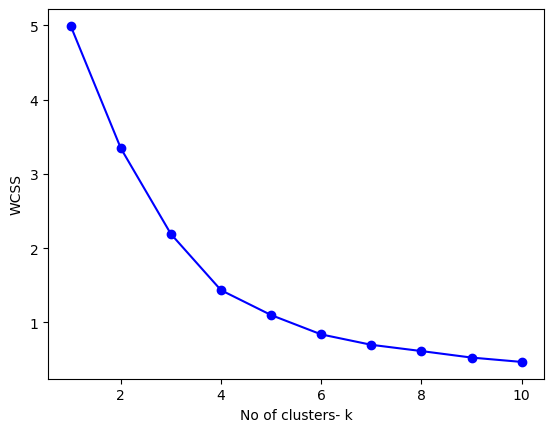

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_24100\2588153969.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('rainbow', max(pred3) + 1)


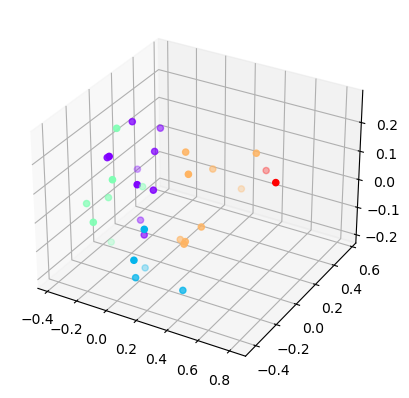

In [57]:


pca3 = PCA(n_components = 3)

x3 = pca3.fit_transform(X3)
# for 2 features ONLY - for data visualization
from sklearn.cluster import KMeans
wcss_1=[]

for k in range(1 ,11) :
    kmeans_1 = KMeans(n_clusters = k)
    kmeans_1.fit(x3)
    wcss_1.append(kmeans_1.inertia_)

#plot the wcss v/s no of clusters graph 
plt.plot(range(1 , 11) , wcss_1, marker='o' , linestyle ='-' , color ='b')
plt.xlabel("No of clusters- k")
plt.ylabel("WCSS")
plt.show()

'''  for 3 features  - feature extraction -PCA  '''
from mpl_toolkits.mplot3d import Axes3D


x_3 = x3[: , :1]
y_3 = x3[: , 1:2]
z_3 = x3[: , 2:]
kmeans_3 = KMeans(n_clusters = 5)
kmeans_3.fit(x3)
pred3 = kmeans_3.predict(x3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = plt.cm.get_cmap('rainbow', max(pred3) + 1)

for i in range(max(pred3) + 1) :
    ax.scatter(x_3[pred3==i] , y_3[pred3==i] , z_3[pred3==i] , c=[colormap(i)] , label =f'Cluster{i}')

plt.show()


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_24100\4183777864.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('rainbow', max(pred3) + 1)


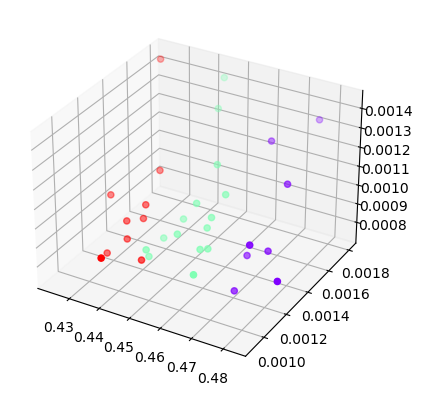

In [50]:
'''  3 features - but feature selection , NO PCA '''

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x3 = np.array(X3.iloc[: , :3])
x_3 = x3[: , :1]
y_3 = x3[: , 1:2]
z_3 = x3[: , 2:]
kmeans_3 = KMeans(n_clusters = 3)
kmeans_3.fit(x3)
pred3 = kmeans_3.predict(x3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = plt.cm.get_cmap('rainbow', max(pred3) + 1)

for i in range(max(pred3) + 1) :
    ax.scatter(x_3[pred3==i] , y_3[pred3==i] , z_3[pred3==i] , c=[colormap(i)] , label =f'Cluster{i}')

plt.show()


In [43]:
#Since the Dataset is somewhat large = 33*50*4  , hence , we also tried taking results from Mini Batch K Means Clustering Algo.

from sklearn.cluster import MiniBatchKMeans 

mini_batch = MiniBatchKMeans (n_clusters = 6 , n_init = 3)

mini_batch.fit(X)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=6, n_init=3)

In [44]:
mini_batch.predict(X[1:2 , :]) ,# according to mini batch k mean , it lies to second cluster 

(array([0]),)

### Sub-Group Discovery

In [45]:
'''  
USe DBSCAn - Density Based Clustering for knowing sub-groups which migh NOT have been visible in KMeans -> these are my sub-groups 

DBSCAN searcehes for core instance s- centroid of densest region using min sample and epsilon nbd.
'''
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(min_samples = 20 , eps = 0.1)
dbscan.fit(X)

DBSCAN(eps=0.1, min_samples=20)

In [47]:
dbscan.labels_  
# at first , i was gettinf from DBSCAN , all the predicted labels of clusters = -1 , 
# meaning the daatset was very very sparse , after dim reduction 
# as in DBSCAN , -1 labels => anamoly 


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [ ]:
'''  Conclusion from DBSCAN 

There are hardly any sub-groups in Dataset .
 '''



### Heirarchical Clustering - Agglomerative Clustering 

In [92]:
''' 
In heirarchichal clustering - all individual data points are trated initially as own  distict clusters ,and sequentially , we go on
 adding the nearest clusters at each step , till all clusters merge into 1 single biggest cluster . 

 stop ats tep when appropriate no of clusters (acc. to you as programmer) are formed . 
e.g. - agglomerative clustering .
'''

from sklearn.cluster import AgglomerativeClustering 

dendogram = AgglomerativeClustering(n_clusters = 7)
pred_heir = dendogram.fit_predict(X)


In [93]:
pred_heir 

array([0, 4, 0, 2, 0, 4, 4, 4, 0, 0, 5, 6, 6, 3, 1, 0, 0, 2, 1, 1, 6, 2,
       3, 3, 3, 3, 1, 1, 1, 0, 5, 4, 0], dtype=int64)

C:\Users\HP\AppData\Local\Temp\ipykernel_24100\3256231629.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('rainbow', max(pred_heir) + 1)


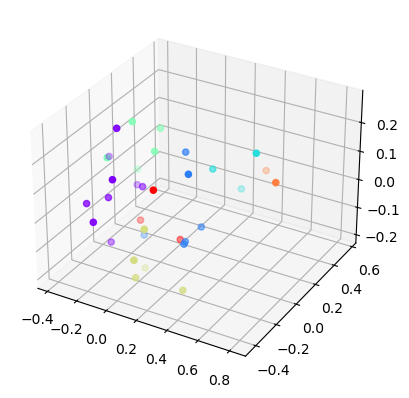

In [94]:
# for 3 features 

'''  for 3 features  - feature extraction -PCA  '''
from mpl_toolkits.mplot3d import Axes3D


x_3 = x3[: , :1]
y_3 = x3[: , 1:2]
z_3 = x3[: , 2:]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = plt.cm.get_cmap('rainbow', max(pred_heir) + 1)

for i in range(max(pred_heir) + 1) :
    ax.scatter(x_3[pred_heir==i] , y_3[pred_heir==i] , z_3[pred_heir==i] , c=[colormap(i)] , label =f'Cluster{i}')

plt.show()


In [79]:
X.shape

(33, 10)

[]

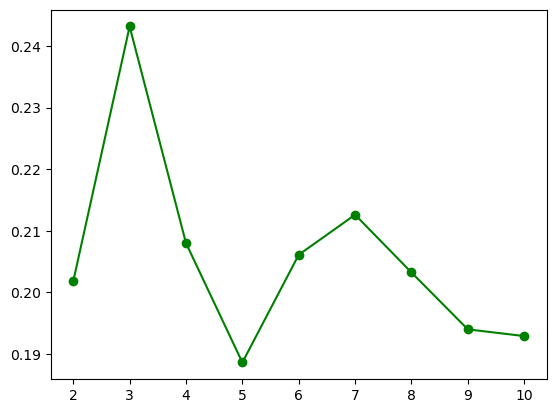

In [91]:
# Conclusion , from Heirarchichal Clustering , we can see visually , the result is a bit better and we can find sub-groups at some levels .

# optimum clusters for Agg clustering 

from sklearn.metrics import silhouette_score  as score

lis = []

for k in range(2, 11) :
    model = AgglomerativeClustering(n_clusters=k)
    
    res = model.fit_predict(X)
    lis.append(score(X , res))


plt.plot(range(2 , 11) , lis , marker ='o' , linestyle = '-' , color='g')
plt.plot()

In [ ]:
# in conclusion , for 7 clusters , we can get a few sub-groups in our daatset for fa . 
# and Now ,same transfer learning of these models can be used to identify sub-groups in AD , MD , and RD . 

###                                 THANK YOU !!!